# Package Import

In [66]:
import tensorflow.lite as tflite
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [34]:
# model import

tf_saved_model = tf.keras.models.load_model(r'C:\Users\jared\Deblur Project\jc implementation\pix2pixmodel/litemodel')

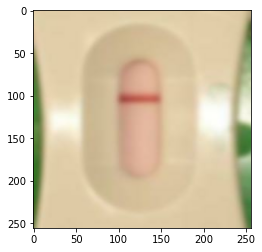

In [61]:
def load(image_file):
    
    """this function loads a blurry image into a float32tensor for further processing"""
    
    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_file)
    image = tf.io.decode_jpeg(image)
    # ensure size is 256x256
    image = tf.image.resize(image, (256, 256))
    # recast to float32
    image = tf.cast(image, tf.float32)
    return image


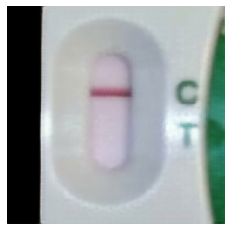

In [92]:
### blurry negative conversion

os.chdir(r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\negatives_blurred')
blurry_dir = r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\negatives_blurred/'
deblurred_dir = r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\deblurred_negatives/'
blurry_negatives = os.listdir()
for i in blurry_negatives:
    image_path = blurry_dir + i
    img = load(image_path)

    # Preprocess the image to required size and cast
    plt.imshow(img / 255.0)
    img = (img / 127.5) -1
    img = np.array(np.expand_dims(img,0))
    prediction = tf_saved_model(img, training = False)
    predicted_image = (prediction[0] + 1) * 127.5
    fig = plt.imshow(predicted_image / 255.0)
    plt.axis('off')
    plt.savefig(deblurred_dir + i, bbox_inches='tight', pad_inches=0)

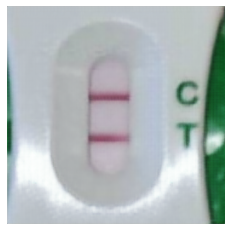

In [93]:
### blurry positive conversion

os.chdir(r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\positives_blurred')
blurry_dir = r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\positives_blurred/'
deblurred_dir = r'C:\Users\jared\Deblur Project\positive negative evaluation\images_test\deblurred_positives/'
blurry_negatives = os.listdir()
for i in blurry_negatives:
    image_path = blurry_dir + i
    img = load(image_path)

    # Preprocess the image to required size and cast
    plt.imshow(img / 255.0)
    img = (img / 127.5) -1
    img = np.array(np.expand_dims(img,0))
    prediction = tf_saved_model(img, training = False)
    predicted_image = (prediction[0] + 1) * 127.5
    fig = plt.imshow(predicted_image / 255.0)
    plt.axis('off')
    plt.savefig(deblurred_dir + i, bbox_inches='tight', pad_inches=0)